Resource: [How to use BERTopic - Machine Learning Assisted Topic Modeling in Python](https://www.youtube.com/watch?v=v3SePt3fr9g)


Also should use some other possible techniques - will see

In [14]:
from bertopic import BERTopic
import pandas as pd
from top2vec import Top2Vec
from langchain.schema import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [2]:
import logging
from typing import Optional
from pathlib import Path

def load_if_scraped(company_id: str) -> Optional[pd.DataFrame]:
    '''
    Transcript loader dataset based on company_id, if nothing found, returns None
    '''
    file_path = Path('..') / 'data' / f'{company_id}.csv'
    if file_path.exists():
        df = pd.read_csv(
            file_path,
            sep='\t',
            quoting=1,
            escapechar='\\',
            doublequote=True,
            quotechar='"',
        )
        logging.info('successfully loaded local transcripts')
        return df
    logging.debug('no local transcripts found')
    return None

company_id = '312932093'
df = load_if_scraped(company_id)

In [15]:
docs = [Document(page_content=doc) for doc in df.full_text.tolist()]

In [24]:
text_splitter: RecursiveCharacterTextSplitter = RecursiveCharacterTextSplitter(
    separators=['\n', '\n\n', '  \n'], chunk_size=512, chunk_overlap=64
)

chunks = text_splitter.split_documents(docs)

docs = [chunk.page_content for chunk in chunks]

In [36]:
model = Top2Vec(docs, speed='learn', workers=4)

2025-04-12 09:40:05,074 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2025-04-12 09:40:05,115 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
INFO:top2vec:Downloading all-MiniLM-L6-v2 model
2025-04-12 09:40:07,108 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-04-12 09:40:07,217 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-04-12 09:40:08,367 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-04-12 09:40:08,373 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [40]:
print("Number of topics:", model.get_num_topics())
topic_count = model.get_num_topics()
# Print the top 3 words for the top 3 topics
topic_words, word_scores, topic_nums = model.get_topics(topic_count)
for i, words in enumerate(topic_words):
    print(f"\nTopic #{topic_nums[i]}:")
    print(", ".join(words))

Number of topics: 2

Topic #0:
domains, domain, business, executives, customers, squarespace, cloud, google, our, we, so, just, not, about, use, now, maybe, what, it, us, will, this, they, really, is, well, do, ve, learning, good, more, don, and, if, get, to, that, your, but, all, how, here, you, are, would, up, re, the, have, for

Topic #1:
cloud, business, executives, google, customers, machine, learning, just, we, our, what, domain, us, you, domains, so, they, your, use, this, the, is, from, at, all, open, are, on, get, with, now, do, about, how, more, in, and, really, ve, to, not, don, have, be, think, here, re, as, it, well


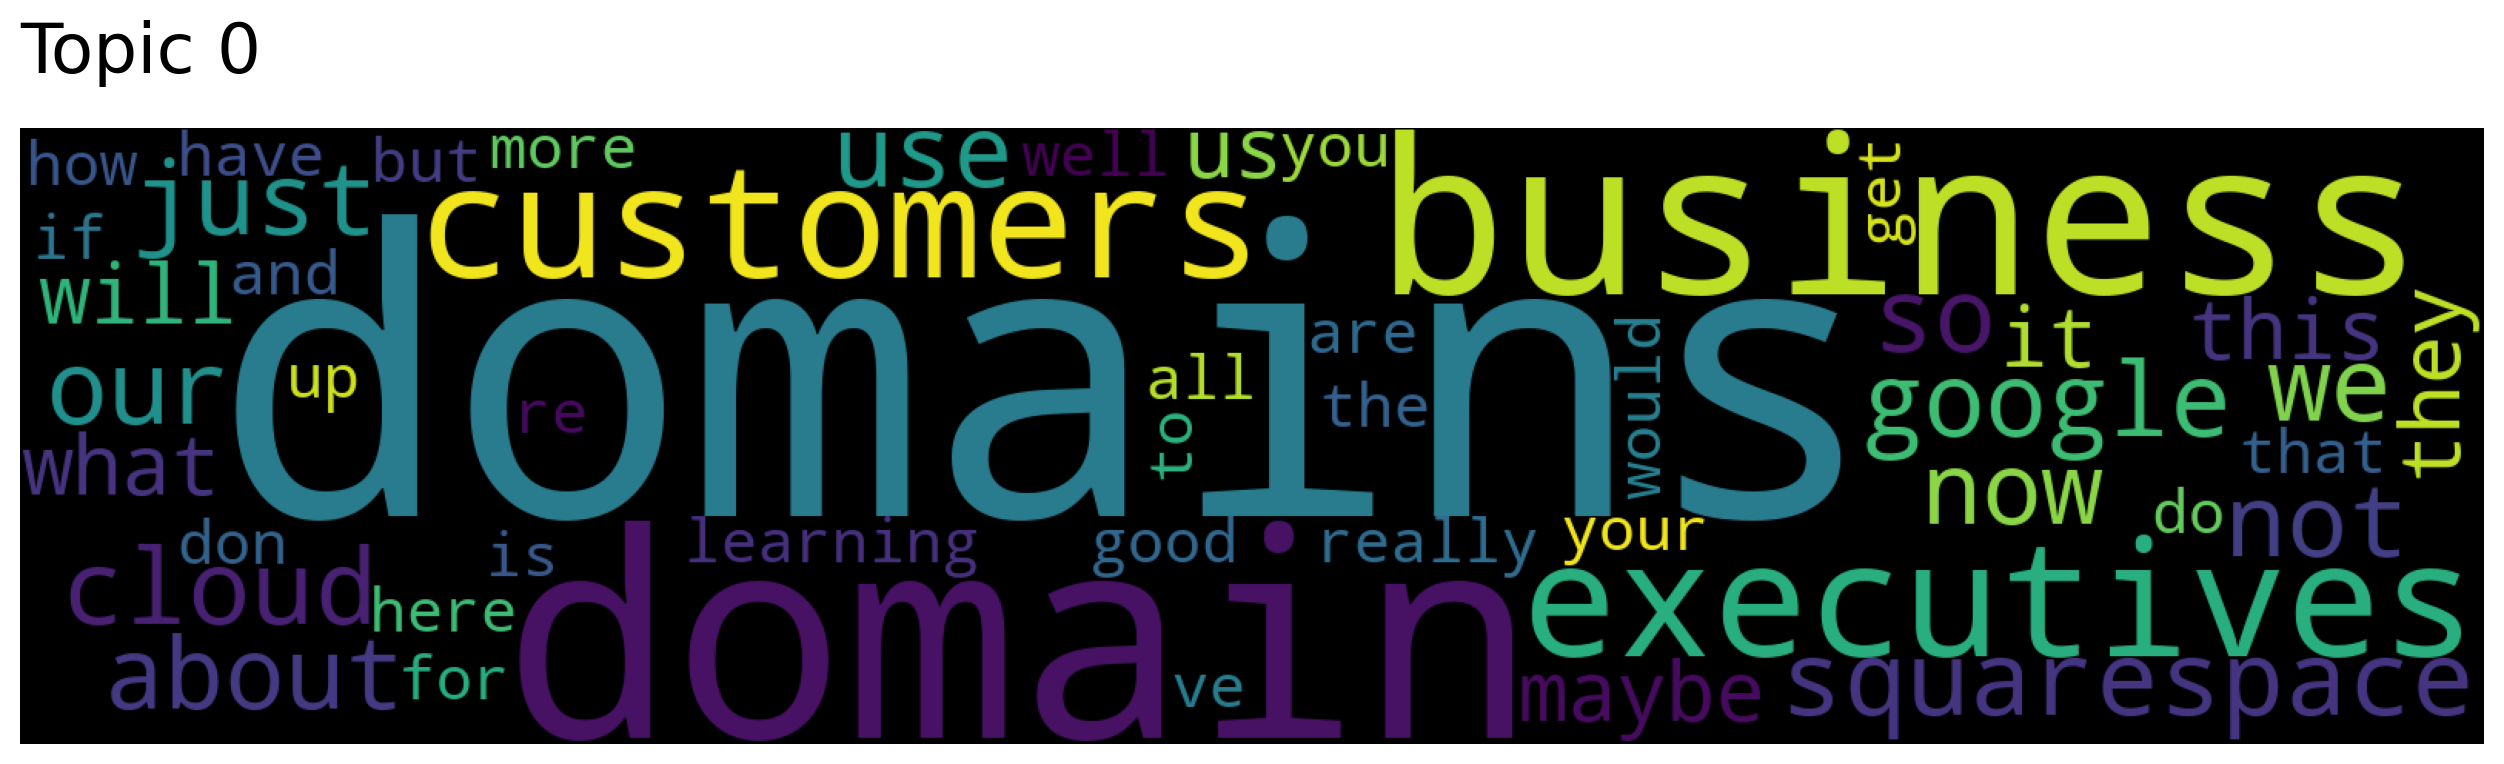

In [41]:
model.generate_topic_wordcloud(0)

In [44]:
model.hierarchical_topic_reduction(num_topics=1)
model.get_topic_hierarchy()

hierarchy = model.get_topic_hierarchy()

# Print the mapping
for original_topic, reduced_topic in enumerate(hierarchy):
    print(f"Original Topic {original_topic} → Reduced Topic {reduced_topic}")

Reducing topics: 100%|██████████| 1/1 [00:00<00:00, 471.80it/s]

Original Topic 0 → Reduced Topic [1, 0]
